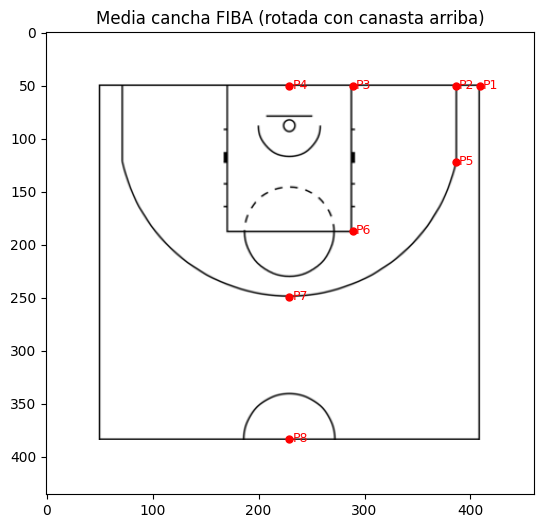

In [1]:
import matplotlib.pyplot as plt
import cv2

# Cargar la imagen ya rotada
img_path = "../../assets/court_diagrams/fiba_white_court_half.png"
court_img = cv2.imread(img_path)
court_img = cv2.cvtColor(court_img, cv2.COLOR_BGR2RGB)

# Diccionario de puntos ajustados visualmente
puntos = {
    'P1': (409, 50),
    'P2': (386, 50),
    'P3': (289, 50),
    'P4': (229, 50),
    'P5': (386, 122),
    'P6': (289, 187),
    'P7': (229, 249),
    'P8': (229, 383)
}

# Visualización
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(court_img)
ax.set_title("Media cancha FIBA (rotada con canasta arriba)")

for nombre, (x, y) in puntos.items():
    ax.plot(x, y, marker='o', markersize=5, color='red')
    ax.text(x+3, y+3, nombre, fontsize=9, color='red')

plt.show()


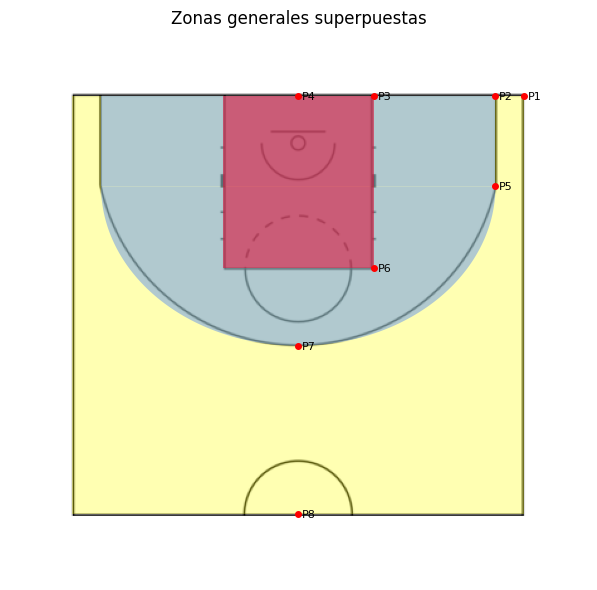

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from shapely.geometry import Polygon
from shapely.ops import unary_union

# Simetría horizontal respecto al eje x = 229
def simetrico_x(p):
    return (229 - (p[0] - 229), p[1])

# Puntos base
P1, P2, P3, P4 = puntos['P1'], puntos['P2'], puntos['P3'], puntos['P4']
P5, P6, P7, P8 = puntos['P5'], puntos['P6'], puntos['P7'], puntos['P8']


P1s = simetrico_x(P1)
P2s = simetrico_x(P2)
P3s = simetrico_x(P3)
P5s = simetrico_x(P5)
P6s = simetrico_x(P6)

# ZONA MITAD DE CANCHA
zona_mitad = Polygon([P1s, P1, (P1[0], P8[1]), (P1s[0], P8[1])])

# ZONA DE 3 SEGUNDOS
zona_3segundos = Polygon([P3s, P3, P6, P6s])

# ZONA DE TRIPLE = zona_dos_interior + elipse

# ZONA DE 2 INTERIOR
zona_dos_interior = Polygon([P2s, P2, P5, P5s])

# MEDIA ELIPSE (triple frontal) ROTADA
xc, yc = 229, 122  # centro actual
a = abs(P5[0] - xc)  # semieje horizontal
b = abs(P7[1] - yc)  # semieje vertical
theta = np.linspace(0, np.pi, 200)  # arco de izquierda a derecha
x_ellipse = xc + a * np.cos(theta)
y_ellipse = yc + b * np.sin(theta)
elipse_coords = np.column_stack((x_ellipse, y_ellipse))
elipse_shape = Polygon(elipse_coords)

zona_triple = unary_union([zona_dos_interior, elipse_shape])


# Mostrar visualmente
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(court_img)

# Dibujar zonas con jerarquía: mitad > triple > 3 segundos
zona_patch_mitad = patches.Polygon(np.array(zona_mitad.exterior.coords), facecolor='yellow', alpha=0.3)
ax.add_patch(zona_patch_mitad)

for poly in zona_triple.geoms:
    zona_patch = patches.Polygon(np.array(poly.exterior.coords), facecolor='cornflowerblue', alpha=0.5)
    ax.add_patch(zona_patch)

zona_patch_3segundos = patches.Polygon(np.array(zona_3segundos.exterior.coords), facecolor='crimson', alpha=0.6)
ax.add_patch(zona_patch_3segundos)


for nombre, (x, y) in puntos.items():
    ax.plot(x, y, 'ro', markersize=4)
    ax.text(x+3, y+3, nombre, fontsize=8, color='black')

plt.title("Zonas generales superpuestas")
plt.axis('off')
plt.tight_layout()
plt.show()

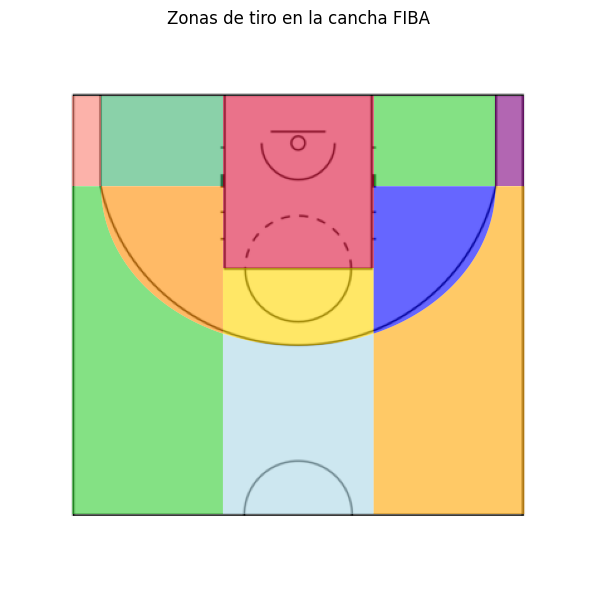

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from shapely.geometry import Polygon, box

# Puntos y zonas auxiliares
Palfa = (P3[0], P5[1])
PalfaS = simetrico_x(Palfa)

Pbeta = (P1[0], P5[1])
PbetaS = simetrico_x(Pbeta)

Pdelta = (P6[0], P7[1])
PdeltaS = simetrico_x(Pdelta)

zona_dos_derecha = Polygon([P3, P2, P5, Palfa])
zona_dos_izquierda = Polygon([P2s, P3s, PalfaS, P5s])

# ZONAS DE TRIPLE 
# Zona 1: Triple central
zona1_rect = box(P6s[0], P6s[1], P6[0], P8[1])
zona1 = zona1_rect.difference(zona_triple)

# Zona 2: Triple ala derecha
zona2_rect = box(Palfa[0], Palfa[1], P1[0], P8[1])
zona2 = zona2_rect.difference(zona_triple)

# Zona 3: Triple ala izquierda
zona3_rect = box(P1s[0], P5[1], P6s[0], P8[1])
zona3 = zona3_rect.difference(zona_triple)

# Zona 4: Triple esquina derecha
zona4 = Polygon([P2, P1, Pbeta, P5])

# Zona 5: Triple esquina izquierda
zona5 = Polygon([P1s, P2s, P5s, simetrico_x(Pbeta)])


# ZONAS DE 2
# Zona 6: 2 frontal
zona1_base = Polygon([P6s, P6, Pdelta, PdeltaS])
zona6 = zona1_base.intersection(zona_triple)

# Zona 7: 2 ala derecha
zona7_base = Polygon([Palfa, Pbeta, (Pbeta[0], Pdelta[1]), Pdelta])
zona7 = zona7_base.difference(zona2)

# Zona 8: 2 ala izquierda
zona8_base = Polygon([PbetaS, PalfaS, PdeltaS, (PbetaS[0], Pdelta[1])])
zona8 = zona8_base.difference(zona3)

# Zona 9: 2 esquina derecha
zona9 = zona_dos_derecha

# Zona 10: 2 esquina izquierda
zona10 = zona_dos_izquierda

# Zona 11: zona de 3 segundos
zona11 = zona_3segundos


# Visualización
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(court_img)

colors = ['lightblue', 'orange', 'limegreen', 'purple', 'salmon', 'gold', 'blue', 'darkorange', 'limegreen', 'mediumseagreen', 'crimson']
zonas = [zona1, zona2, zona3, zona4, zona5, zona6, zona7, zona8, zona9, zona10, zona11]

for zona, color in zip(zonas, colors):
    if zona.geom_type == 'Polygon':
        ax.add_patch(patches.Polygon(np.array(zona.exterior.coords), facecolor=color, alpha=0.6))
    elif zona.geom_type == 'MultiPolygon':
        for subzona in zona.geoms:
            ax.add_patch(patches.Polygon(np.array(subzona.exterior.coords), facecolor=color, alpha=0.6))

plt.title("Zonas de tiro en la cancha FIBA")
plt.axis('off')
plt.tight_layout()
plt.show()

El punto POINT (260 100) está en: Zona 11 - Zona 3 segs


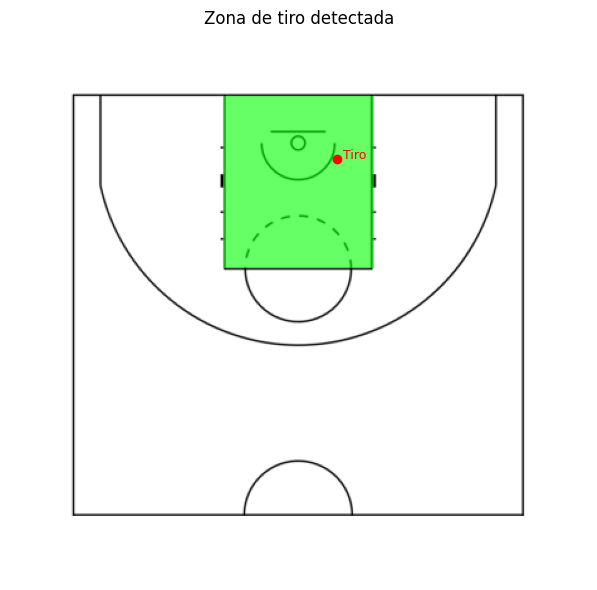

In [4]:
from shapely.geometry import Point

# Diccionario con todas las zonas y sus nombres
zonas = {
    'Zona 1 - Triple frontal': zona1,
    'Zona 2 - Triple ala sup': zona2,
    'Zona 3 - Triple ala inf': zona3,
    'Zona 4 - Triple esquina sup': zona4,
    'Zona 5 - Triple esquina inf': zona5,
    'Zona 6 - Dos frontal': zona6,
    'Zona 7 - Dos ala sup': zona7,
    'Zona 8 - Dos ala inf': zona8,
    'Zona 9 - Dos esquina sup': zona9,
    'Zona 10 - Dos esquina inf': zona10,
    'Zona 11 - Zona 3 segs': zona11
}

# Punto de prueba
punto = Point(260, 100)

zona_encontrada = None
for nombre, zona in zonas.items():
    if zona.covers(punto):
        zona_encontrada = (nombre, zona)
        break

# Mostrar resultado
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(court_img)

if zona_encontrada:
    nombre_zona, zona_geom = zona_encontrada
    print(f"El punto {punto} está en: {nombre_zona}")

    # Dibujar zona encontrada
    if hasattr(zona_geom, 'geoms'):  # MultiPolygon
        for poly in zona_geom.geoms:
            ax.add_patch(patches.Polygon(np.array(poly.exterior.coords), facecolor='lime', alpha=0.6))
    else:
        ax.add_patch(patches.Polygon(np.array(zona_geom.exterior.coords), facecolor='lime', alpha=0.6))

    # Dibujar punto
    ax.plot(punto.x, punto.y, 'ro', markersize=6)
    ax.text(punto.x + 5, punto.y, "Tiro", fontsize=9, color='red')
else:
    print(f"El punto {punto} no está en ninguna zona conocida.")

plt.title("Zona de tiro detectada")
plt.axis('off')
plt.tight_layout()
plt.show()

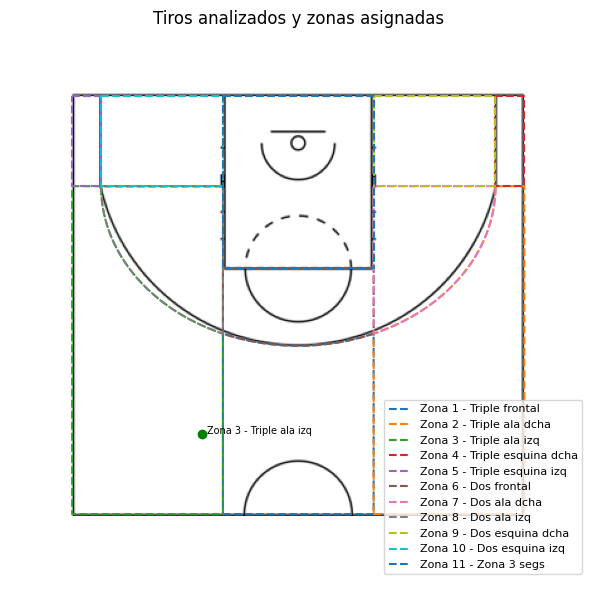

In [5]:
import numpy as np
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

zonas_estudio = {
    'Zona 1 - Triple frontal': zona1,
    'Zona 2 - Triple ala dcha': zona2,
    'Zona 3 - Triple ala izq': zona3,
    'Zona 4 - Triple esquina dcha': zona4,
    'Zona 5 - Triple esquina izq': zona5,
    'Zona 6 - Dos frontal': zona6,
    'Zona 7 - Dos ala dcha': zona7,
    'Zona 8 - Dos ala izq': zona8,
    'Zona 9 - Dos esquina dcha': zona9,
    'Zona 10 - Dos esquina izq': zona10,
    'Zona 11 - Zona 3 segs': zona11
}

# Carga del CSV
csv_path = "data_simulation.csv"
df = pd.read_csv(csv_path, header=None, names=['tipo', 'frame', 'x', 'y'])

# Obtener posición del aro (línea con tipo 'r')
rim_row = df[df['tipo'] == 'r'].iloc[0]
rim_pos = (rim_row['x'], rim_row['y'])

# Obtener todas las detecciones de tiro ('s') y anotación ('m')
shots = df[df['tipo'] == 's'][['frame', 'x', 'y']]
mades = df[df['tipo'] == 'm'][['frame', 'x', 'y']]

# Agrupar tiros por frames cercanos (shots consecutivos) para identificar únicos tiros
clusters = []
current_cluster = []
last_frame = -10

for _, row in shots.iterrows():
    if row['frame'] - last_frame > 3 and current_cluster:
        clusters.append(current_cluster)
        current_cluster = []
    current_cluster.append((int(row['frame']), row['x'], row['y']))
    last_frame = row['frame']

if current_cluster:
    clusters.append(current_cluster)

# Tomar el cluster más largo como el verdadero intento de tiro
main_cluster = max(clusters, key=lambda c: len(c)) if clusters else []

cleaned_shots = []

if main_cluster:
    cluster = np.array(main_cluster)
    avg_frame = int(np.mean(cluster[:, 0]))
    avg_x = np.mean(cluster[:, 1])
    avg_y = np.mean(cluster[:, 2])
    cleaned_shots.append(('s', avg_frame, avg_x, avg_y))

# Obtener detección de anotación más estable (en el centro del grupo) TODO: MEDIA DE LOS MISMOS FRAME
if not mades.empty:
    made_array = mades[['frame', 'x', 'y']].values
    center_idx = len(made_array) // 2
    cleaned_shots.append(('m', int(made_array[center_idx][0]),
                          made_array[center_idx][1],
                          made_array[center_idx][2]))

# Obtener detección de anotación más estable (en el centro del grupo) TODO: MEDIA DE LOS MISMOS FRAME
if not mades.empty:
    made_array = mades[['frame', 'x', 'y']].values
    center_idx = len(made_array) // 2
    cleaned_shots.append(('m', int(made_array[center_idx][0]),
                          made_array[center_idx][1],
                          made_array[center_idx][2]))

# Función para asignar zona
def asignar_zona(point, zonas_dict):
    for nombre, poly in zonas_dict.items():
        if poly.contains(point):
            return nombre
    return None

# Visualización de los tiros sobre el diagrama
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(court_img)

zonas_detectadas = []

# Asumimos que como máximo hay un 's' y un 'm' por CSV
has_made = any(tipo == 'm' for tipo, *_ in cleaned_shots)
for tipo, frame, x, y in cleaned_shots:
    if tipo == 's':
        punto = Point(x, y)
        zona = asignar_zona(punto, zonas_estudio)
        color = 'green' if has_made else 'red'
        ax.plot(x, y, 'o', color=color, markersize=6)
        if zona:
            ax.text(x + 4, y, zona, color='black', fontsize=7)
            zonas_detectadas.append((zona, has_made))

# Dibuja los contornos de las zonas
for nombre, zona in zonas_estudio.items():
    if zona.is_empty:
        continue
    if zona.geom_type == 'Polygon':
        coords = np.array(zona.exterior.coords)
        ax.plot(coords[:, 0], coords[:, 1], '--', label=nombre)
    elif zona.geom_type == 'MultiPolygon':
        for poly in zona.geoms:
            coords = np.array(poly.exterior.coords)
            ax.plot(coords[:, 0], coords[:, 1], '--', label=nombre)

plt.title("Tiros analizados y zonas asignadas")
plt.axis('off')
plt.tight_layout()
plt.legend(fontsize=8)
plt.show()


In [6]:
import pandas as pd
from collections import defaultdict

# Contadores por zona
conteo = defaultdict(lambda: {'aciertos': 0, 'intentos': 0})

for zona, acierto in zonas_detectadas:
    conteo[zona]['intentos'] += 1
    if acierto:
        conteo[zona]['aciertos'] += 1

# Crear dataframe
df_stats = pd.DataFrame([
    {
        'Zona': zona,
        'Aciertos': datos['aciertos'],
        'Intentos': datos['intentos'],
        'Efectividad (%)': 100 * datos['aciertos'] / datos['intentos'] if datos['intentos'] > 0 else 0
    }
    for zona, datos in conteo.items()
])

# Asegurar que estén todas las zonas (aunque sea con 0 intentos)
for nombre in zonas_estudio.keys():
    if nombre not in df_stats['Zona'].values:
        df_stats = pd.concat([df_stats, pd.DataFrame([{
            'Zona': nombre,
            'Aciertos': 0,
            'Intentos': 0,
            'Efectividad (%)': 0.0
        }])], ignore_index=True)

# Ordenar por zona
df_stats = df_stats.sort_values(by='Zona').reset_index(drop=True)

# Mostrar la tabla con pandas
display(df_stats)

,Zona,Aciertos,Intentos,Efectividad (%)
0,Zona 1 - Triple frontal,0,0,0.0
1,Zona 10 - Dos esquina izq,0,0,0.0
2,Zona 11 - Zona 3 segs,0,0,0.0
3,Zona 2 - Triple ala dcha,0,0,0.0
4,Zona 3 - Triple ala izq,1,1,100.0
5,Zona 4 - Triple esquina dcha,0,0,0.0
6,Zona 5 - Triple esquina izq,0,0,0.0
7,Zona 6 - Dos frontal,0,0,0.0
8,Zona 7 - Dos ala dcha,0,0,0.0
9,Zona 8 - Dos ala izq,0,0,0.0


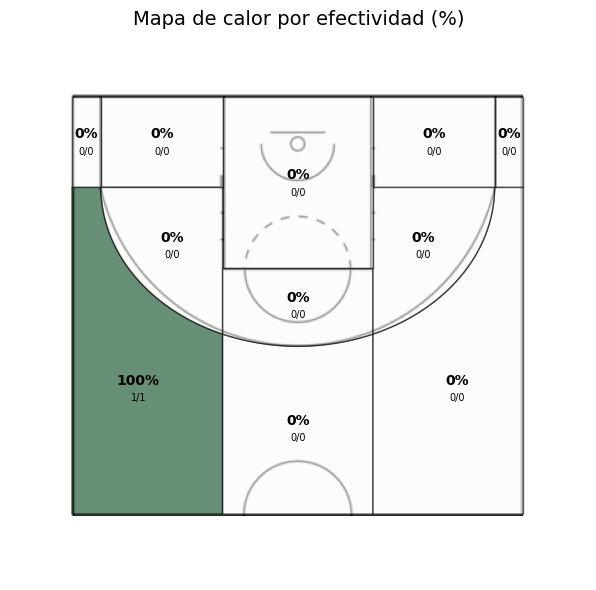

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from shapely.geometry import Polygon, MultiPolygon

# Crear el mapa de calor
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.imshow(court_img)

# Escala para intensidad de color (colormap)
max_efectividad = df_stats['Efectividad (%)'].max()

for nombre, zona in zonas_estudio.items():
    efectividad = df_stats.loc[df_stats['Zona'] == nombre, 'Efectividad (%)'].values[0]
    intentos = df_stats.loc[df_stats['Zona'] == nombre, 'Intentos'].values[0]
    aciertos = df_stats.loc[df_stats['Zona'] == nombre, 'Aciertos'].values[0]

    intensidad = efectividad / max_efectividad if max_efectividad > 0 else 0
    color = plt.cm.Greens(intensidad)

    # Dibujar la zona
    if isinstance(zona, Polygon):
        coords = np.array(zona.exterior.coords)
        patch = patches.Polygon(coords, facecolor=color, edgecolor='black', alpha=0.6)
        ax.add_patch(patch)
        centroid = zona.centroid
        cx, cy = centroid.x, centroid.y
    elif isinstance(zona, MultiPolygon):
        largest_poly = max(zona.geoms, key=lambda g: g.area)
        coords = np.array(largest_poly.exterior.coords)
        patch = patches.Polygon(coords, facecolor=color, edgecolor='black', alpha=0.6)
        ax.add_patch(patch)
        centroid = largest_poly.centroid
        cx, cy = centroid.x, centroid.y

    # Añadir texto con porcentaje y fracción
    ax.text(cx, cy - 6, f'{efectividad:.0f}%', color='black',
            fontsize=10, ha='center', va='center', weight='bold')
    ax.text(cx, cy + 8, f'{aciertos}/{intentos}', color='black',
            fontsize=7, ha='center', va='center')

plt.title('Mapa de calor por efectividad (%)', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

In [8]:
import pickle

# Exportar zonas_estudio a archivo pickle
with open("court_zones.pkl", "wb") as f:
    pickle.dump(zonas_estudio, f)

print("✅ Zonas exportadas a 'court_zones.pkl'")

# Verificar: cargar el archivo y mostrar los nombres de las zonas
with open("court_zones.pkl", "rb") as f:
    zonas_importadas = pickle.load(f)

print("✅ Zonas importadas correctamente:")
for nombre in zonas_importadas:
    print("  -", nombre)


✅ Zonas exportadas a 'court_zones.pkl'
✅ Zonas importadas correctamente:
  - Zona 1 - Triple frontal
  - Zona 2 - Triple ala dcha
  - Zona 3 - Triple ala izq
  - Zona 4 - Triple esquina dcha
  - Zona 5 - Triple esquina izq
  - Zona 6 - Dos frontal
  - Zona 7 - Dos ala dcha
  - Zona 8 - Dos ala izq
  - Zona 9 - Dos esquina dcha
  - Zona 10 - Dos esquina izq
  - Zona 11 - Zona 3 segs
